# Task2: Data Cleaning and Preprocessing, Machine Learning
### Dataset Description:
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

### Task Overview:
Your task is to perform the following operations:

### Data Loading: Load the dataset (https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) into a Pandas DataFrame.

### Initial Exploration:

Check for missing values and handle them appropriately
Explore basic statistics (mean, median, min, max, etc.) for numerical columns.
Explore categorical variables (unique values, value counts).

### Data Cleaning:

Handle duplicate records if any.
Clean data inconsistencies, such as inconsistent capitalization or formatting issues in categorical columns.
Remove outliers in numerical columns if necessary (using statistical methods or domain knowledge).


### Data Preparation:

Split the dataset into training and testing sets for machine learning models.

### Visualization:

Visualize relationships between features (e.g., correlation matrix, scatter plots).

Feature Engineering:

Extract useful features from existing columns (e.g., extract month and year from InvoiceDate).
Create new features if beneficial (e.g., total purchase amount per invoice).
Data Transformation:

Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.
Scale numerical features if needed (using techniques like StandardScaler or MinMaxScaler).

Machine Learning Pipeline:

Build a Regression model using machine learninig algorithms from scratch using numpy.
Evaluate the model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = "/content/AB_NYC_2019.csv"
df = pd.read_csv(file_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## EDA and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Check for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df = df.drop(['host_name','host_id','id','name', 'host_name', 'neighbourhood', 'last_review', 'reviews_per_month'], axis = 1)

In [ ]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 3.4+ MB


In [ ]:
# Handle missing values (e.g., drop rows with missing values)
df = df.dropna()

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
le = LabelEncoder()
df['room_type'] = le.fit_transform(df['room_type'])
df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])

In [ ]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,40.64749,-73.97237,1,149,1,9,6,365
1,2,40.75362,-73.98377,0,225,1,45,2,355
2,2,40.80902,-73.94190,1,150,3,0,1,365
3,1,40.68514,-73.95976,0,89,1,270,1,194
4,2,40.79851,-73.94399,0,80,10,9,1,0


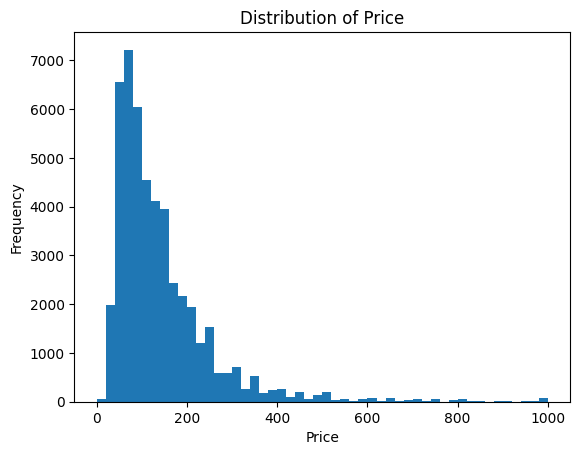

In [ ]:
# @title Distribution of Price
plt.hist(df['price'], bins=50, range=(0, 1000)) # Adjust the range as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

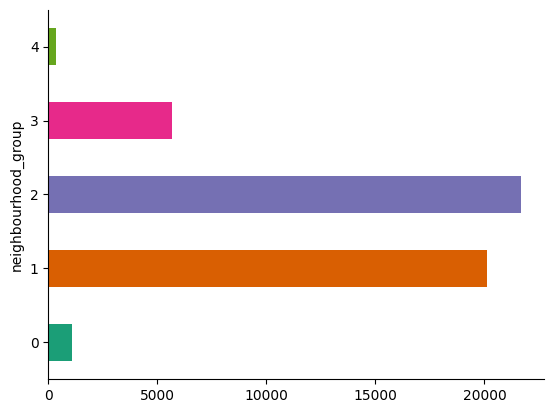

In [ ]:
# @title Neighbourhood groups
df.groupby('neighbourhood_group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

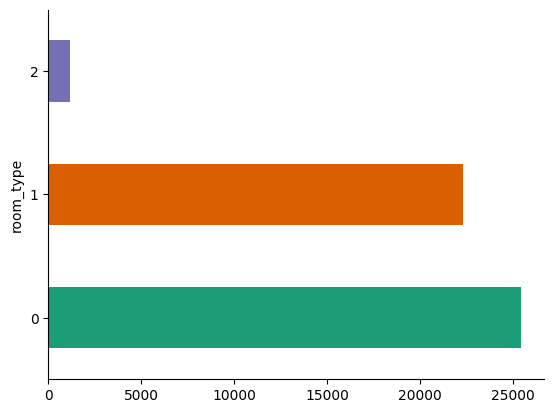

In [ ]:
# @title Room Type
df.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

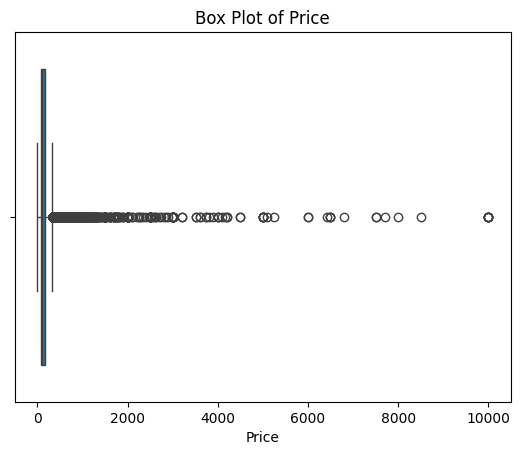

In [ ]:
# @title Check Outliers
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

In [ ]:
# Remove outliers in numerical columns (using IQR method as an example)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

df = remove_outliers(df, 'price')

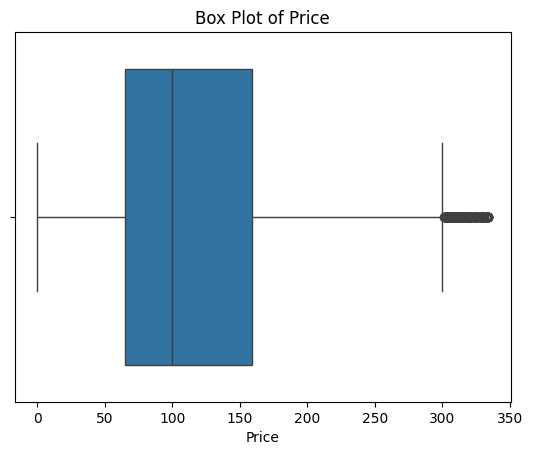

In [ ]:
# @title Check outliers after handling
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

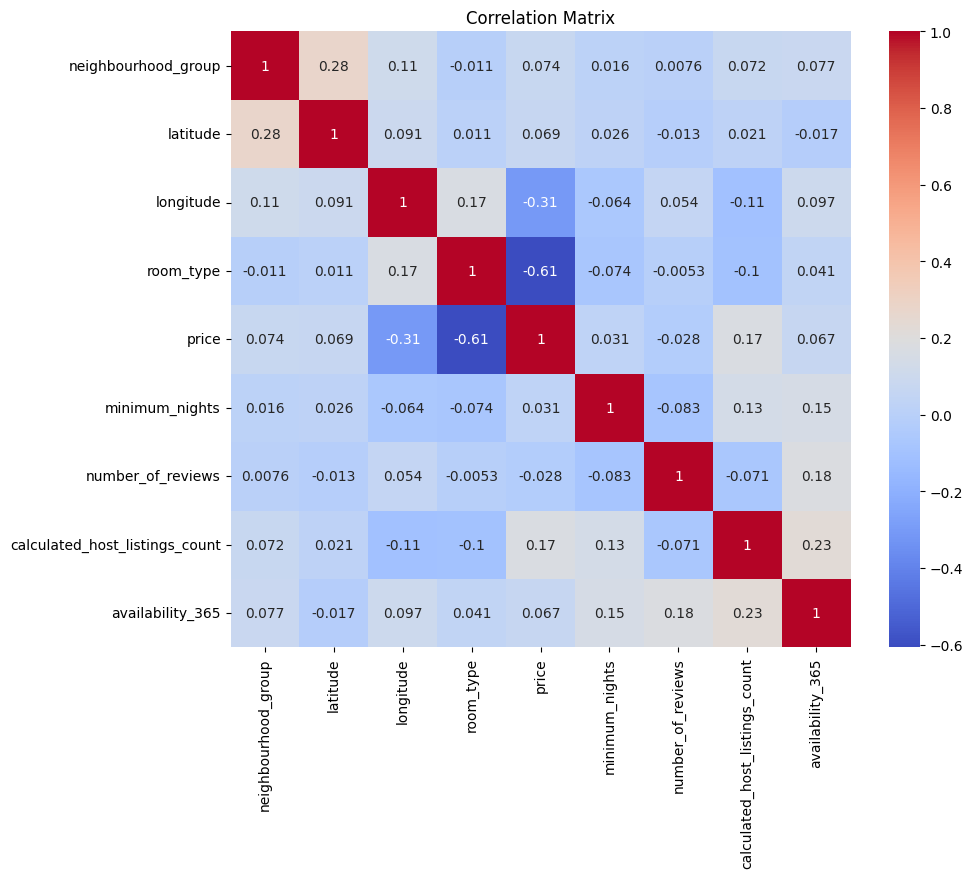

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Splitting and Modeling

In [ ]:
data = df.copy()
# Define X (features) and y (target variable)
X = data.drop(columns=['price'])  # Assuming 'price' is the target variable
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize StandardScaler and fit it to the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 2633.9485292661057
Root Mean Squared Error: 51.32200823492886
R-squared: 0.4345641802972058


In [ ]:
# Take a sample from the test set
sample = X_test_scaled[0]
# Reshape the sample to a 2D array
sample_reshaped = sample.reshape(1, -1)
# Make the prediction
predicted_price = model.predict(sample_reshaped)
print("Predicted price:", predicted_price[0])

Predicted price: 57.00392590212696
